<a href="https://colab.research.google.com/github/Ranaba123/Cancer_Mortality_Status_Predictor/blob/main/w2052777_20221241_S_K_N_Ranaba_Final_Notebook_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## w2052777 - Final Python Notebook 2: Mortality Status Classifiers, their performances and Hyperparameters optimisations.
Author: Sembu Kuttige Nemsara Ranaba

Peer reviewed by : Pyara Perera

# ====================== Load Data ======================


In [ ]:
import pandas as pd

In [ ]:
# Load preprocessed dataset
data = pd.read_csv('/content/drive/MyDrive/Machine Learning/Coursework/w2052777_Preprocesed_Dataset.csv')

In [ ]:
data.shape

(4017, 15)

# ====================== Data Inspection ======================


In [ ]:
# Examine the variables which are represented in the perpared dataset
list(data.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Regional_Node_Positive',
 'Survival_Months',
 'Mortality_Status']

In [ ]:
# Examine the variable types which are represented in the perpared dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4017 entries, 0 to 4016
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4017 non-null   int64  
 1   Sex                     4017 non-null   int64  
 2   T_Stage                 4017 non-null   int64  
 3   N_Stage                 4017 non-null   int64  
 4   6th_Stage               4017 non-null   int64  
 5   Differentiated          4017 non-null   int64  
 6   Grade                   4017 non-null   int64  
 7   A_Stage                 4017 non-null   int64  
 8   Tumor_Size              4017 non-null   float64
 9   Estrogen_Status         4017 non-null   int64  
 10  Progesterone_Status     4017 non-null   int64  
 11  Regional_Node_Examined  4017 non-null   int64  
 12  Regional_Node_Positive  4017 non-null   int64  
 13  Survival_Months         4017 non-null   int64  
 14  Mortality_Status        4017 non-null   

In [ ]:
# Display some values in the dataset
data.head(15)

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Regional_Node_Positive,Survival_Months,Mortality_Status
0,68,1,0,0,0,1,3,1,4.0,1,1,24,1,60,0
1,50,1,1,1,2,0,2,1,35.0,1,1,14,5,62,0
2,58,1,2,2,4,0,2,1,63.0,1,1,14,7,75,0
3,58,1,0,0,0,1,3,1,18.0,1,1,2,1,84,0
4,47,1,1,0,1,1,3,1,41.0,1,1,3,1,50,0
5,51,1,0,0,0,0,2,1,20.0,1,1,18,2,89,0
6,51,1,0,0,0,3,1,1,8.0,1,1,11,1,54,0
7,40,1,1,0,1,0,2,1,30.0,1,1,9,1,14,1
8,40,1,3,2,4,1,3,1,103.0,1,1,20,18,70,0
9,69,1,3,2,4,3,1,0,32.0,1,1,21,12,92,0


In [ ]:
# a method to control the rows and columns truncation in  dataset
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

# ====================== Prepare Modelling Data ======================

In [ ]:
# Declare feature variables and target variable
feature_cols = ['Age','Sex','T_Stage','N_Stage','6th_Stage','Differentiated',
                'Grade','A_Stage','Tumor_Size','Estrogen_Status',
                'Progesterone_Status','Regional_Node_Examined',
                'Regional_Node_Positive']
X = data[feature_cols] # Features
y = data['Mortality_Status']

In [ ]:
# Printing the input feaures

print("Input Features",X.columns)


Input Features Index(['Age', 'Sex', 'T_Stage', 'N_Stage', '6th_Stage', 'Differentiated', 'Grade', 'A_Stage', 'Tumor_Size', 'Estrogen_Status', 'Progesterone_Status',
       'Regional_Node_Examined', 'Regional_Node_Positive'],
      dtype='object')


In [ ]:
# Importing a Python library module and function to allow  to randomly sample  training and test subsets
from sklearn.model_selection import train_test_split

In [ ]:
# samples  dataset into training and test subsets with a ratio
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
print(f"Shape of X_train: {X_train.shape}, Shape of X_test: {X_test.shape}")

print(f"Shape of y_train: {y_train.shape}, Shape of y_test: {y_test.shape}")


Shape of X_train: (3213, 13), Shape of X_test: (804, 13)
Shape of y_train: (3213,), Shape of y_test: (804,)


# ====================== Logistic Regression Model ======================

In [ ]:
data.shape

(4017, 15)

In [ ]:
#library to initiate the Logistic Regression modelling algorithm
from sklearn.linear_model import LogisticRegression

In [ ]:

# Initialize the Logistic Regression model with increased max_iter for convergence
logreg = LogisticRegression()


In [ ]:
# function that estimates logreg algorithm learnable parameters using the desired sampled dataset.
logreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Predictions
y_pred_train = logreg.predict(X_train)
y_pred = logreg.predict(X_test)

In [ ]:
#compare each patient's mortality status to those predicted by the model
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
comparison_df


,Actual,Predicted
3101,1,1
776,1,0
3866,1,0
872,0,0
2284,0,0
...,...,...
549,0,0
356,0,0
1556,0,0
2614,0,0


In [ ]:
print(f"Logistic regression  Model Accuracy: {accuracy_score(y_test, y_pred)}")


Logistic regression  Model Accuracy: 0.8544776119402985


In [ ]:
#initiates the required library and function, then calculates and present training data  accuracy score only.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_train, y_pred_train)
print ("Dataset training is : ", accuracy)


Dataset training is :  0.8543417366946778


In [ ]:
#initiates the required library and function, then calculates and present training data  accuracy score only.
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print ("Dataset testing accuracy is : ", accuracy)



Dataset testing accuracy is :  0.8544776119402985


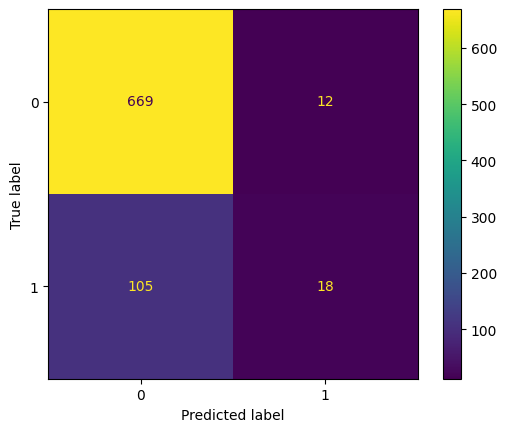

In [ ]:
# initiates the required library and function, then calculates and presents your desired confusion matrix only.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

logistic_regression_confusion_matrix = confusion_matrix(y_test, y_pred, labels=logreg.classes_)

disp = ConfusionMatrixDisplay(logistic_regression_confusion_matrix, display_labels=logreg.classes_)
disp.plot()



In [ ]:
#Python code block that initiates the required library and function for the report the display this report.
from sklearn.metrics import classification_report
target_names = ['Alive', 'Dead']  # Define the target names

print(classification_report(y_test, y_pred, target_names=target_names))


              precision    recall  f1-score   support

       Alive       0.86      0.98      0.92       681
        Dead       0.60      0.15      0.24       123

    accuracy                           0.85       804
   macro avg       0.73      0.56      0.58       804
weighted avg       0.82      0.85      0.81       804



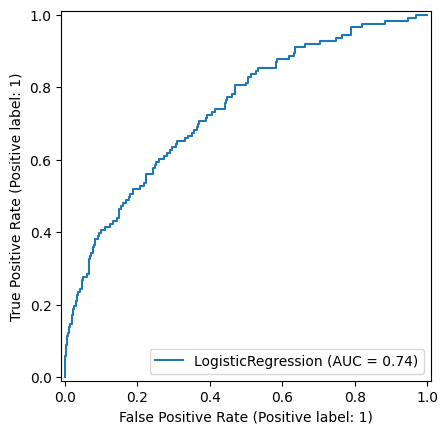

In [ ]:
#initiates the required library and function, then display this AUC-ROC.
from sklearn.metrics import RocCurveDisplay
logreg=RocCurveDisplay.from_estimator(logreg, X_test, y_test)


# ====================== K-Nearest Neighbors Model ======================


In [ ]:
# initiate a machine learning library and function to use the KNN modelling algorithm.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# it declare  K-Nearest Neighbour modelling algorithm
knn = KNeighborsClassifier(n_neighbors=9)

In [ ]:
# fit the training to the knn algorithm
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [ ]:
knn.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
# Printing the classification report of the knn algorithm
y_pred_knn = knn.predict(X_test)

print(f"KNN Model Accuracy: {accuracy_score(y_test, y_pred_knn)}")




target_names = ['Alive', 'Dead']  # Define the target names
print(classification_report(y_test, y_pred_knn,target_names=target_names))


KNN Model Accuracy: 0.8370646766169154
              precision    recall  f1-score   support

       Alive       0.85      0.98      0.91       681
        Dead       0.33      0.07      0.11       123

    accuracy                           0.84       804
   macro avg       0.59      0.52      0.51       804
weighted avg       0.77      0.84      0.79       804



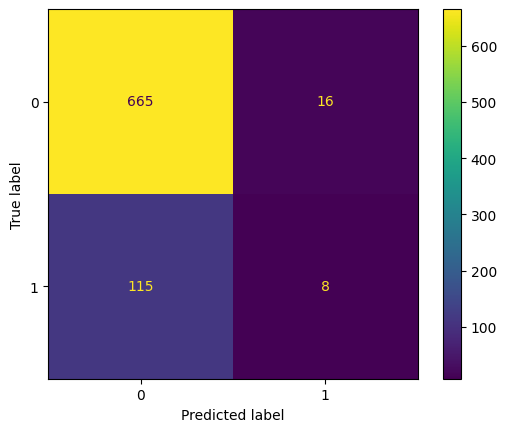

In [ ]:
# Printing the confussion matrix report of the knn algorithm


confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_knn)
disp_knn.plot()


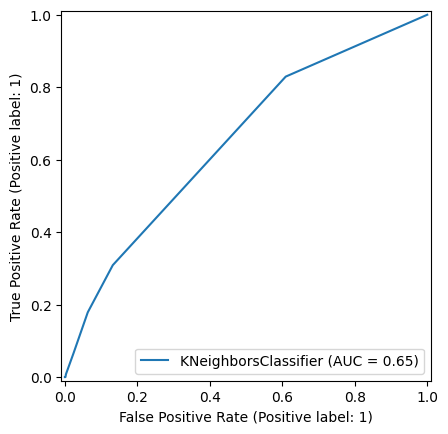

In [ ]:
# Roc Curve display of the KNN algorithm
RocCurveDisplay.from_estimator(knn, X_test, y_test)


## =============================== Tunning the model=====================

In [ ]:
# initiates a suitable library and a nested cross-validation algorithm in  environment.
from sklearn.model_selection import GridSearchCV

In [ ]:
#Tunes the model's hyperparameters and displays the best combination of hyperparameters in the data subset

from sklearn.model_selection import GridSearchCV
import numpy as np
#create new a knn model
knn = KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors and distances
param_grid = {'n_neighbors': np.arange(1, 25), 'metric': ['euclidean', 'manhattan']}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn, param_grid, cv=5, scoring = 'roc_auc')
#fit model to data
knn_gscv.fit(X, y)


print("\nBest Hyperparameters:", knn_gscv.best_params_)


Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': np.int64(24)}


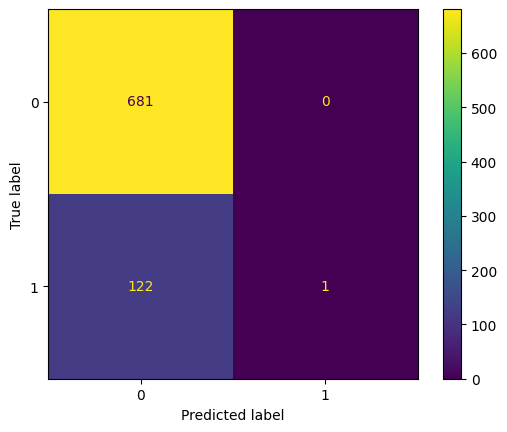

In [ ]:
# Predict the target variable for the test data using the tuned model
y_pred_tuned = knn_gscv.predict(X_test)

# Generate the confusion matrix
cm_tuned_model = confusion_matrix(y_test, y_pred_tuned, labels=knn_gscv.classes_)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm_tuned_model, display_labels=knn_gscv.classes_)
disp.plot()

In [ ]:
#optimized hyperparameters to predict mortality status on the test data subset.
y_pred_tuned = knn_gscv.predict(X_test)

print(f"Tuned Model Accuracy: {accuracy_score(y_test, y_pred_tuned)}")


Tuned Model Accuracy: 0.8482587064676617


In [ ]:
# after tunning knn classification report
target_names = ['Alive', 'Dead']  # Define the target names

print(classification_report(y_test, y_pred_tuned,target_names=target_names))

              precision    recall  f1-score   support

       Alive       0.85      1.00      0.92       681
        Dead       1.00      0.01      0.02       123

    accuracy                           0.85       804
   macro avg       0.92      0.50      0.47       804
weighted avg       0.87      0.85      0.78       804



# ====================== Naive Bayes Model ======================


In [ ]:
# initiate a machine learning library and the Naive Bayes modelling algorithm
#train it with  training data subset
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)


GaussianNB()

In [ ]:
y_pred_nb = nb.predict(X_test)
print(f"\nNaive Bayes Test Accuracy: {accuracy_score(y_test, y_pred_nb)}")


Naive Bayes Test Accuracy: 0.7810945273631841


In [ ]:
# Displaying the nb cassification reprt
target_names = ['Alive', 'Dead']  # Define the target names
print(classification_report(y_test, y_pred_nb,target_names=target_names))


              precision    recall  f1-score   support

       Alive       0.89      0.84      0.87       681
        Dead       0.33      0.43      0.38       123

    accuracy                           0.78       804
   macro avg       0.61      0.64      0.62       804
weighted avg       0.81      0.78      0.79       804



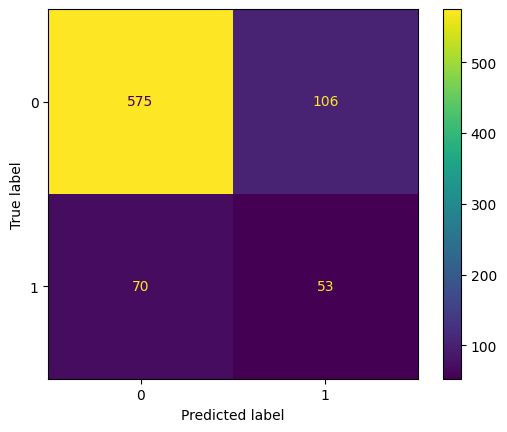

In [ ]:
# displaing the nb confussion matrix
cm_nb = confusion_matrix(y_test, y_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp_nb.plot()


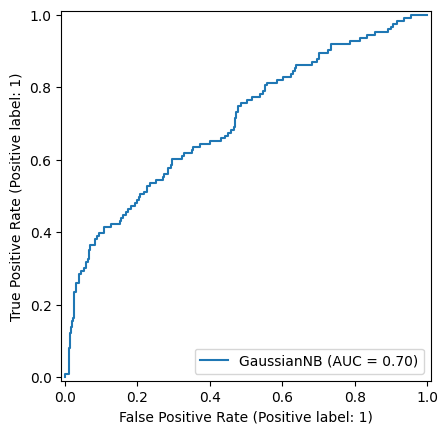

In [ ]:
# Roc Curve display of the NB algorithm
RocCurveDisplay.from_estimator(nb, X_test, y_test,)
